In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

PATH_SOURCE = "/home/jbassham/jack/data/ece228"
PATH_DEST = "/home/jbassham/jack/ECE228/outputs"

START_YEAR = 1992
END_YEAR = 2020
HEM = 'nh'

In [4]:
# Extract variables

fnam = f"motion_ppv4_latlon_{HEM}_{START_YEAR}_{END_YEAR}.npz"
data = np.load(os.path.join(PATH_SOURCE, fnam), allow_pickle=True)
r = data['error']

rt = r[1:,:,:]

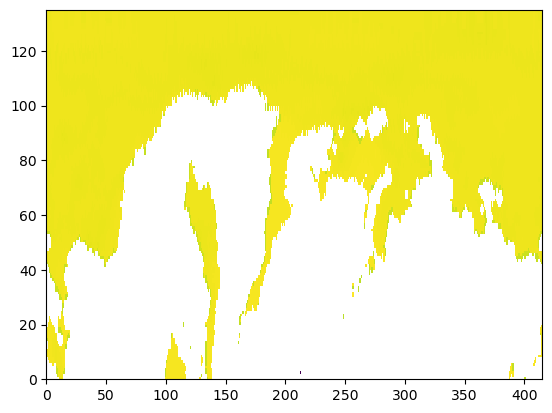

In [6]:
plt.pcolormesh(rt[0,:,:])

/tmp/ipykernel_512099/1569048988.py:1: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(np.nanmean(rt, axis=0))


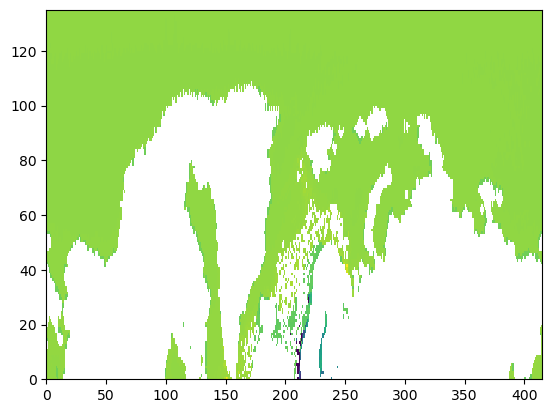

In [7]:
plt.pcolormesh(np.nanmean(rt, axis=0))

In [8]:
PATH_GRID = "/home/jbassham/jack/ECE228/inputs"

# Latitude Longitude Grid
fnam = 'lat_lon.npz'
data = np.load(os.path.join(PATH_GRID, fnam))
lat = data['lat']
lon = data['lon']

/tmp/ipykernel_512099/1954460196.py:1: RuntimeWarning: Mean of empty slice
  dataplt = [np.nanmean(rt, axis = 0), np.nanvar(rt, axis = 0),]
/tmp/ipykernel_512099/1954460196.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice.
  dataplt = [np.nanmean(rt, axis = 0), np.nanvar(rt, axis = 0),]


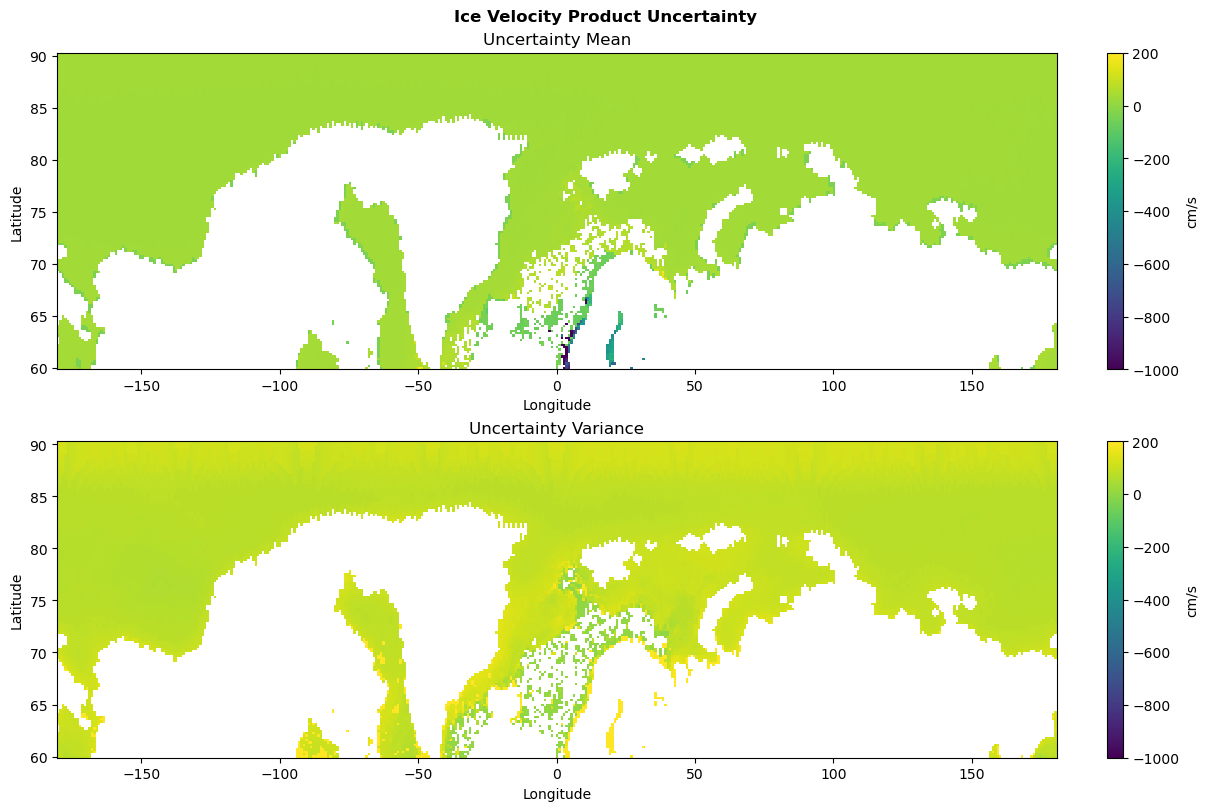

In [11]:
dataplt = [np.nanmean(rt, axis = 0), np.nanvar(rt, axis = 0),]
nd = len(dataplt)
titles = ['Uncertainty Mean', 'Uncertainty Variance']

vmin = -1000
vmax = 200

fig, axs = plt.subplots(nrows=nd, ncols=1, figsize=(12, nd*4), constrained_layout=True)

for i in range(nd):
    pcm = axs[i].pcolormesh(lon, lat, dataplt[i], vmin = vmin, vmax = vmax)
    fig.colorbar(pcm, ax=axs[i], label = 'cm/s')
    axs[i].set(title=titles[i], xlabel='Longitude', ylabel='Latitude')

fig.suptitle(r'Ice Velocity Product Uncertainty', fontweight = 'bold')

# Save plot
fnam = f'UncPlot.jpeg'
plt.savefig(os.path.join(PATH_DEST, fnam), dpi=300, format='jpeg')

plt.show()